In [ ]:
# https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook

In [449]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [450]:
from sklearn.model_selection import train_test_split

# Import and prepare data

In [451]:
test, train = pd.read_csv("./test.csv"), pd.read_csv("./train.csv")

In [452]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [453]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [454]:
train_id, test_id = train["PassengerId"], test["PassengerId"]
train.drop("PassengerId",axis=1,inplace=True), test.drop("PassengerId",axis=1,inplace=True)

(None, None)

In [455]:
target = train["Survived"]
train.drop("Survived",axis=1,inplace=True)

# Feature Understanding

In [456]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [457]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

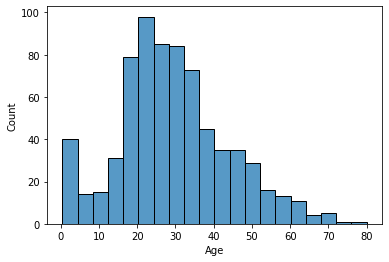

In [458]:
sns.histplot(train.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

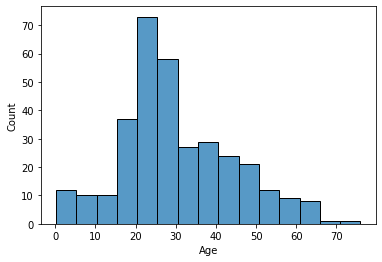

In [459]:
sns.histplot(test.Age)

In [460]:
#Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.
train.Age[train.Age.isnull()] = train.Age[train.Age.notnull()].median()
test.Age[test.Age.isnull()] = test.Age[test.Age.notnull()].median()

/var/folders/k4/dnx7k_tx471_2_1qhs587stm0000gn/T/ipykernel_2251/3383739837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Age[train.Age.isnull()] = train.Age[train.Age.notnull()].median()
/var/folders/k4/dnx7k_tx471_2_1qhs587stm0000gn/T/ipykernel_2251/3383739837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Age[test.Age.isnull()] = test.Age[test.Age.notnull()].median()


In [461]:
train.Embarked[train.Embarked.isnull()] = train.Embarked.mode()[0]

/var/folders/k4/dnx7k_tx471_2_1qhs587stm0000gn/T/ipykernel_2251/2328532546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Embarked[train.Embarked.isnull()] = train.Embarked.mode()[0]


In [462]:
test[test.Pclass==3].Fare.mean(), test[test.Pclass==2].Fare.mean(), test[test.Pclass==1].Fare.mean()

(12.459677880184334, 22.20210430107527, 94.28029719626169)

In [463]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [464]:
test.Fare[test.Fare.isnull()] = test[test.Pclass==3].Fare.mean()

/var/folders/k4/dnx7k_tx471_2_1qhs587stm0000gn/T/ipykernel_2251/3564020003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare[test.Fare.isnull()] = test[test.Pclass==3].Fare.mean()


In [465]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [466]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

# Feature engineering

In [467]:
categorical = ["Pclass","Sex","SibSp","Parch","Embarked"]
numerical = ["Age","Fare"]

In [468]:
train_size = train.shape[0]

In [469]:
#one hot
one_hot = pd.get_dummies(pd.concat([train[categorical],test[categorical]],ignore_index=True), columns=categorical)

In [470]:
train_one_hot, test_one_hot = one_hot[:train_size], one_hot[train_size:]

<AxesSubplot:xlabel='Fare', ylabel='Count'>

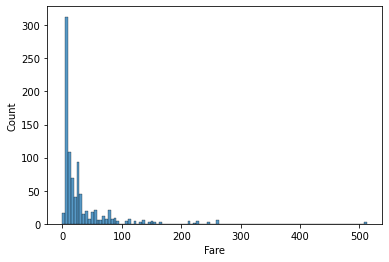

In [471]:
#Fare/Age
sns.histplot(train["Fare"])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

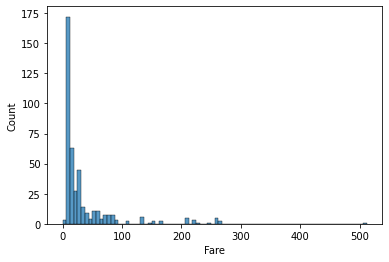

In [472]:
sns.histplot(test["Fare"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

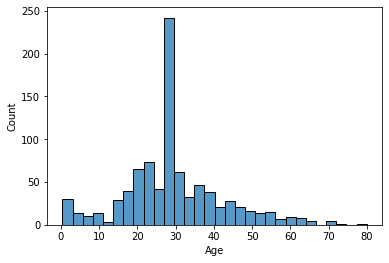

In [473]:
sns.histplot(train["Age"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

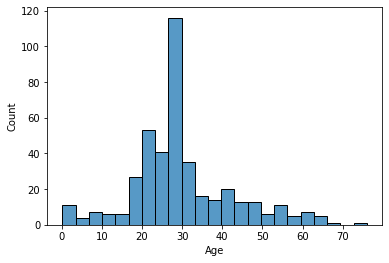

In [474]:
sns.histplot(test["Age"])

In [475]:
train_numerical, test_numerical = train[numerical], test[numerical]

In [476]:
train_numerical.Fare, test_numerical.Fare = np.log1p(train_numerical.Fare), np.log1p(test_numerical.Fare)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [477]:
from sklearn.preprocessing import StandardScaler
numerical_scaler = StandardScaler()
train_numerical = pd.DataFrame(numerical_scaler.fit_transform(train_numerical),index = train_numerical.index, columns = train_numerical.columns)
test_numerical = pd.DataFrame(numerical_scaler.transform(test_numerical),index = test_numerical.index, columns = test_numerical.columns)


test_numerical.index = test_one_hot.index

In [478]:
train_final, test_final = \
    pd.concat([train_one_hot, train_numerical],axis=1), pd.concat([test_one_hot, test_numerical],axis=1)

In [479]:
#fit and prediction

In [480]:
from sklearn.linear_model import LogisticRegression

In [481]:
model = LogisticRegression()

In [486]:
model.fit(train_final.drop("Fare",axis=1), target)

LogisticRegression()

In [489]:
res = model.predict(test_final.drop("Fare",axis=1))

In [490]:
#output
out_dict = {"PassengerId":test_id,"Survived":res}
pd.DataFrame(out_dict).to_csv("submission.csv",index=False)